<a href="https://colab.research.google.com/github/201ssc/kaggle_test/blob/main/kaggle_titanic_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

import missingno as msno
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis


# 1. Pclass

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).sum()

,Survived
Sex,
female,233
male,109


In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).count()

,Survived
Sex,
female,314
male,577


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


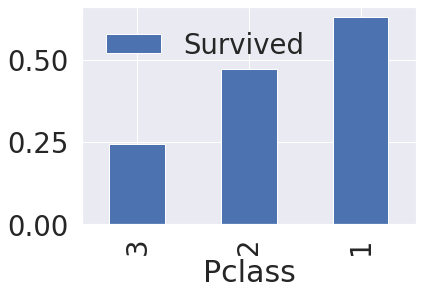

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar()

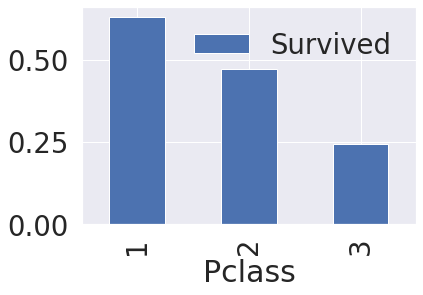

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# sort_values : Pclass, 내림차순 (1>2>3)

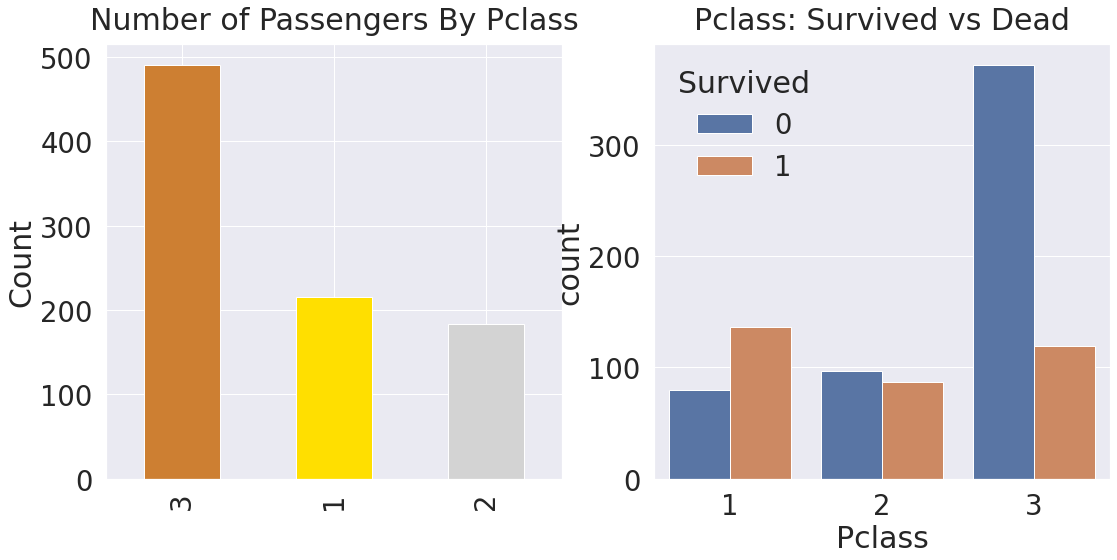

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position )
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

https://seaborn.pydata.org/generated/seaborn.countplot.html

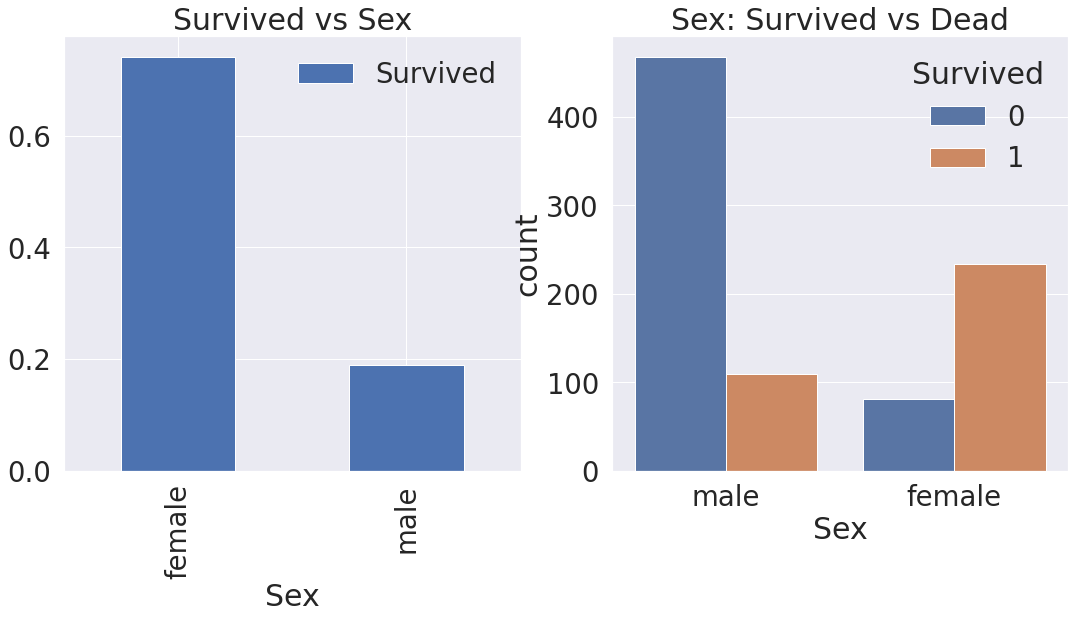

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

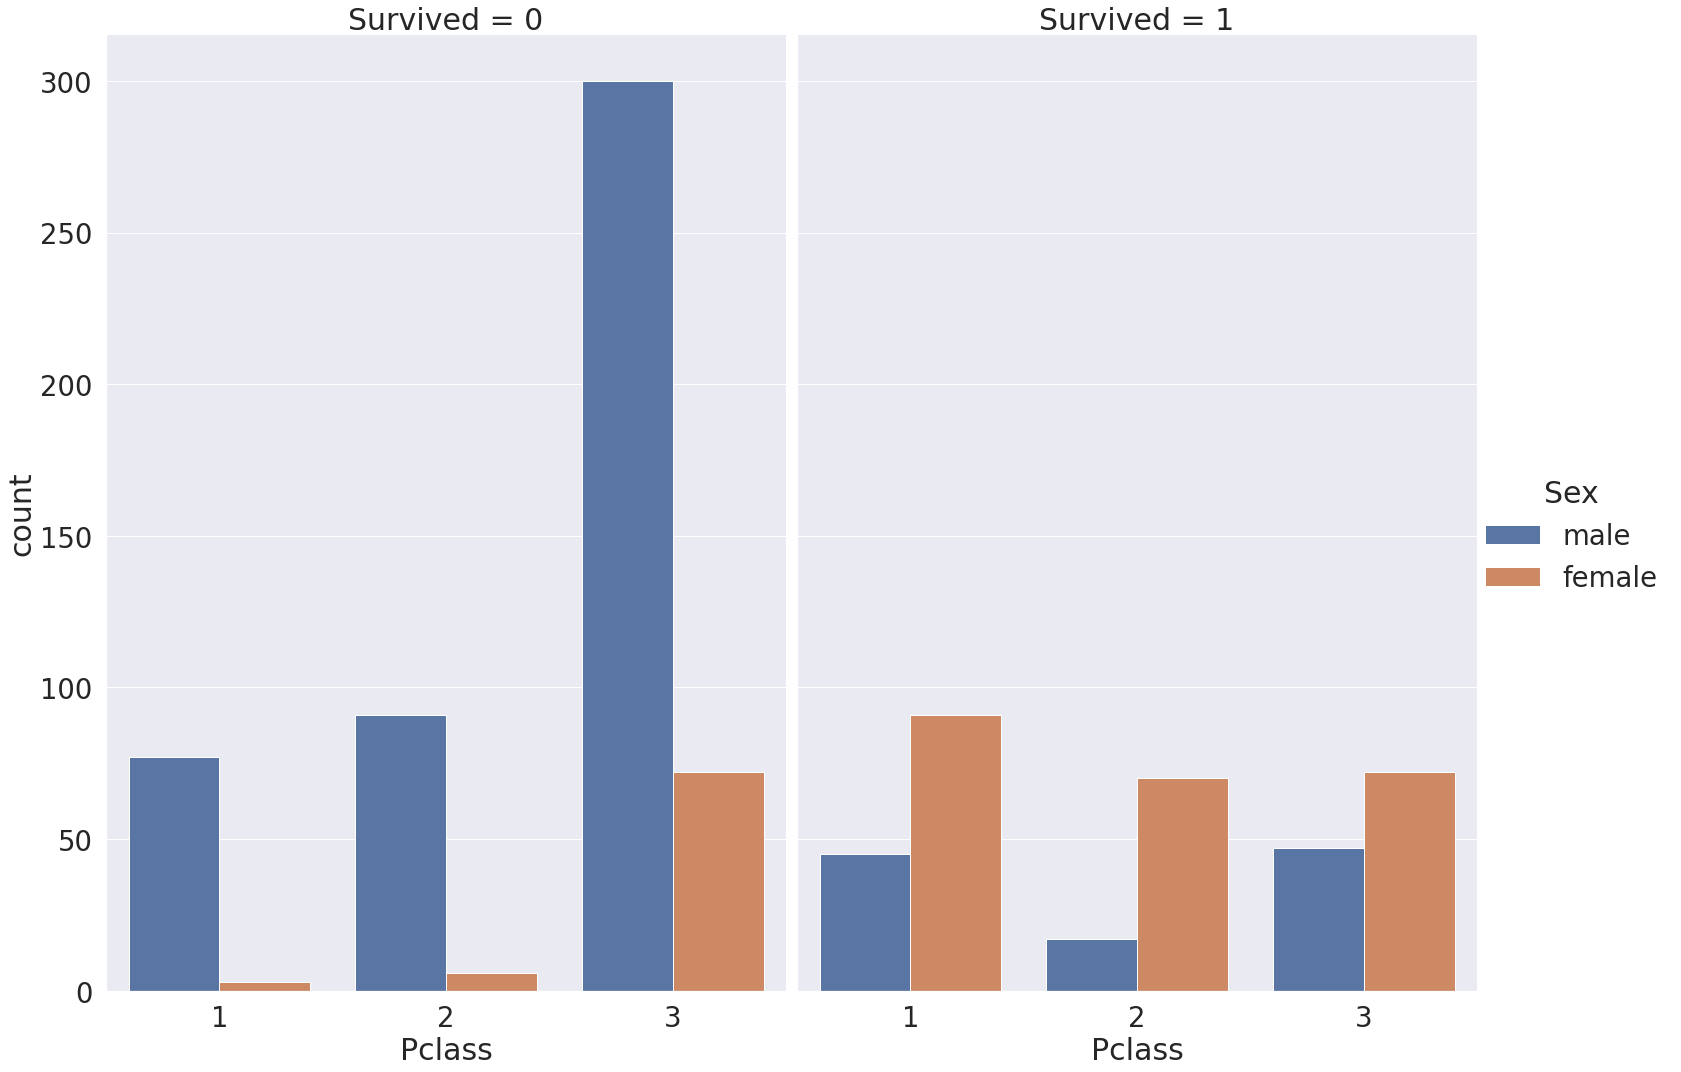

In [ ]:
# sns.catplot('Pclass', 'Survived', hue='Sex', data=df_train, 
#                size=6, aspect=1.5)
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df_train, kind="count",
                size=15, aspect=0.7);

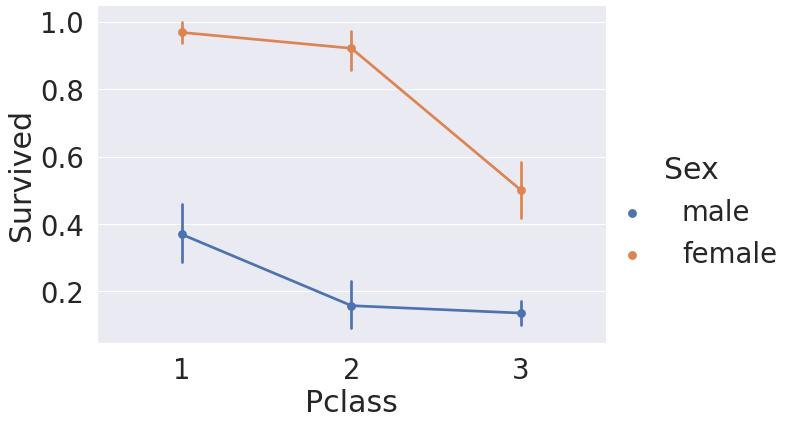

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

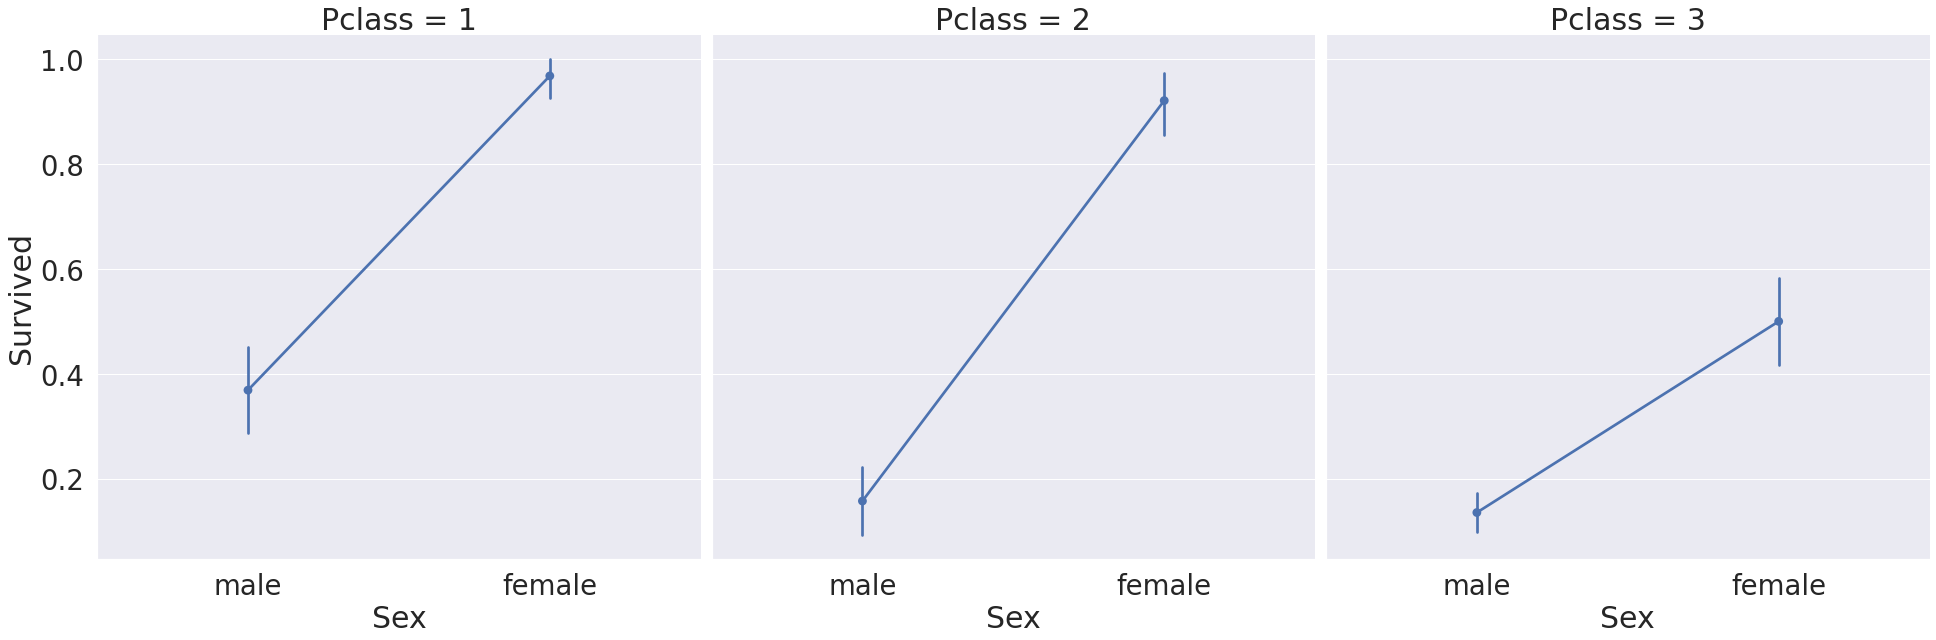

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, satureation=.5,
               size=9, aspect=1
              )

#2. Age

In [25]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


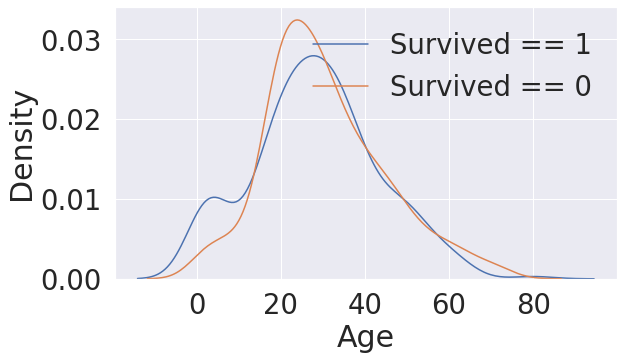

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

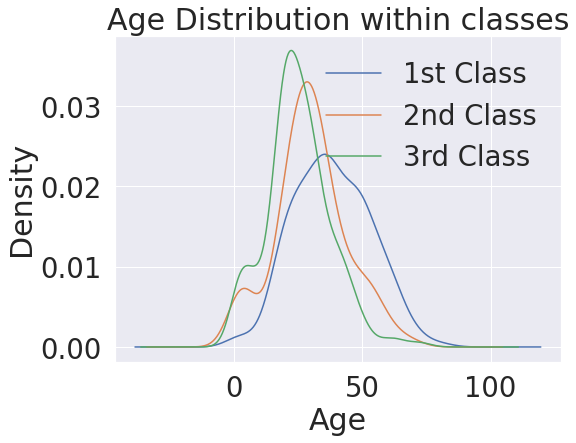

In [27]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [28]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

#df_train.shape[0]

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


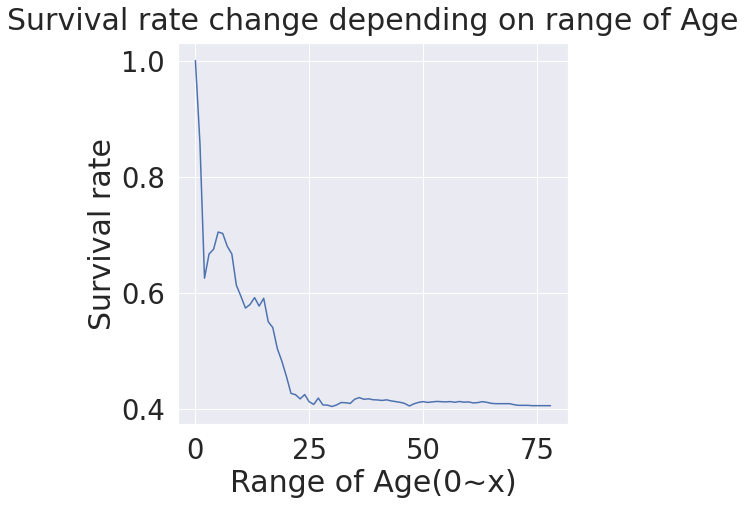

In [40]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

신뢰할 수 없다. :1, :2, .. :80 값은 나이에 대한 생존율이 아니라, 전체 생존율이다.

[0-10] [1-11]  [2-12] ... [70-80]으로 묶어서 생존률을 비교해야 한다.

In [ ]:
for i in range(10, 81):
  ii = i - 10
  llv= df_train[df_train['Age'] < i]['Survived'].sum() - df_train[df_train['Age'] < ii]['Survived'].sum()
  llv2 = len(df_train[df_train['Age'] < i]['Survived'])-len(df_train[df_train['Age'] < ii]['Survived'])
  llv3 = llv /llv2 * 100
  print("{:.0f} ~ {:.0f}살, 총 {:.0f} 명 중, 생존자는 {:.0f} 명이며 생존률은 {:.0f}%입니다".format(ii,i,llv2,llv,llv3))

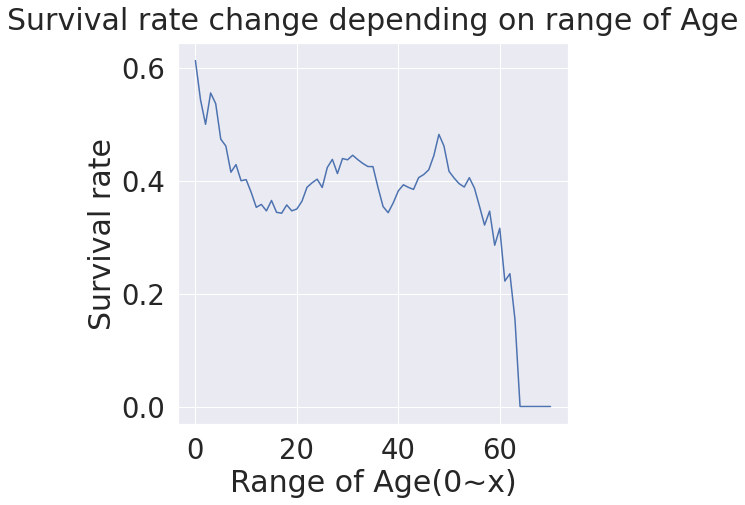

In [107]:
cummulate_survival_ratio = []
for i in range(10, 81):
  ii = i - 10
  llv= df_train[df_train['Age'] < i]['Survived'].sum() - df_train[df_train['Age'] < ii]['Survived'].sum()
  llv2 = len(df_train[df_train['Age'] < i]['Survived'])-len(df_train[df_train['Age'] < ii]['Survived'])
  cummulate_survival_ratio.append(llv / llv2)

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

삼십대 후반 ~ 사십대 초반에 해당하는 사람들에 생존률이, 신체가 건강함에도 떨어지는 이유는 그들의 어린자녀를 살리기 위해, 본인들이 대신 희생했기 때문이라 예측이 된다.


이 점은 이후, 나이대별 부모에 비율과 해당 자녀에 평균적인 나이를 비교해본다면 좀 더 명확해 질 것이라고 생각된다.

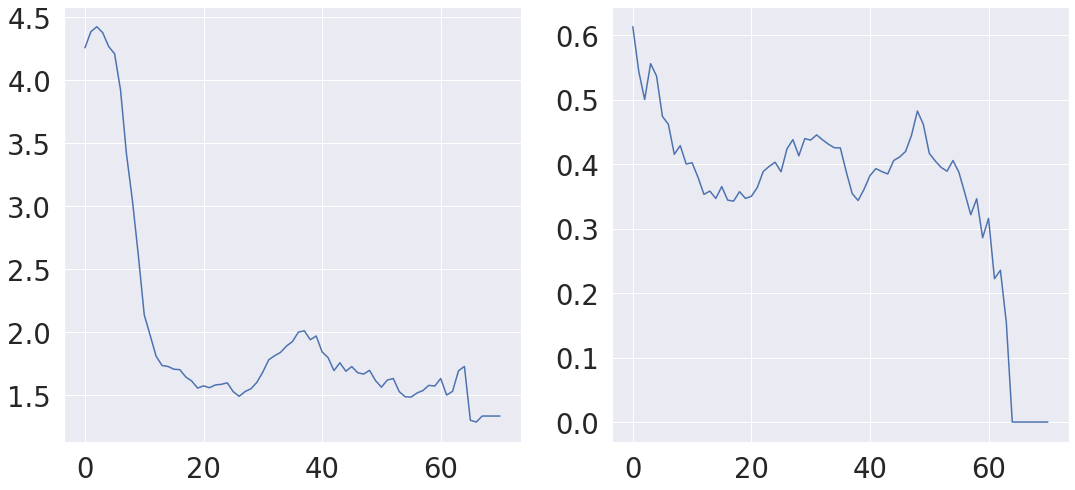

In [166]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
c1 = []
c2 = []
for i in range(10, 81):
  ii = i - 10
  ff =  df_train[df_train['Age'] < i]['FamilySize'].sum() -  df_train[df_train['Age'] < ii]['FamilySize'].sum()
  ff2 =  len(df_train[df_train['Age'] < i]) - len(df_train[df_train['Age'] < ii])
  llv= df_train[df_train['Age'] < i]['Survived'].sum() - df_train[df_train['Age'] < ii]['Survived'].sum()
  llv2 = len(df_train[df_train['Age'] < i]['Survived'])-len(df_train[df_train['Age'] < ii]['Survived'])
  c1.append(ff / ff2)
  c2.append(llv/llv2)


#f=plt.subplots(figsize=(8,8))
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].plot(c1)
ax[1].plot(c2)

plt.show()

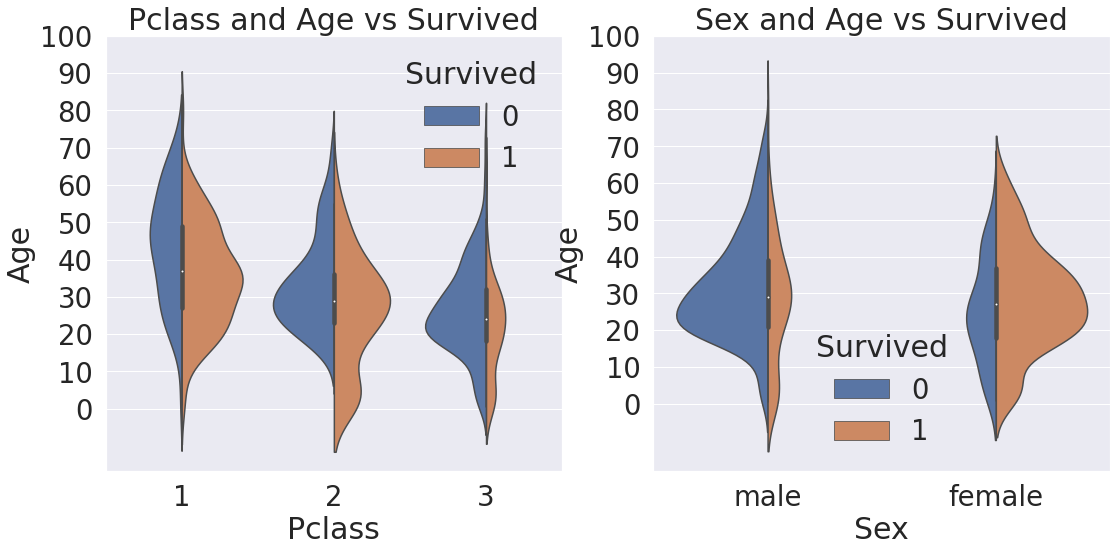

In [108]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 3. Embarked
탑승항구

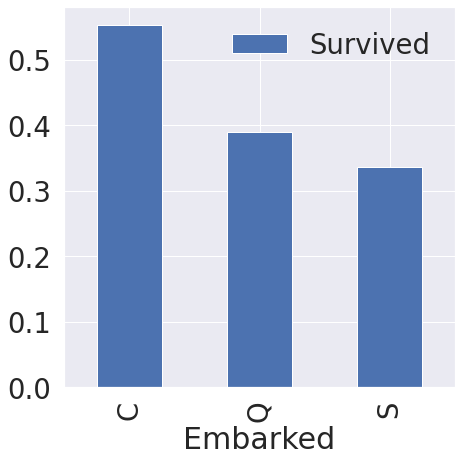

In [122]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

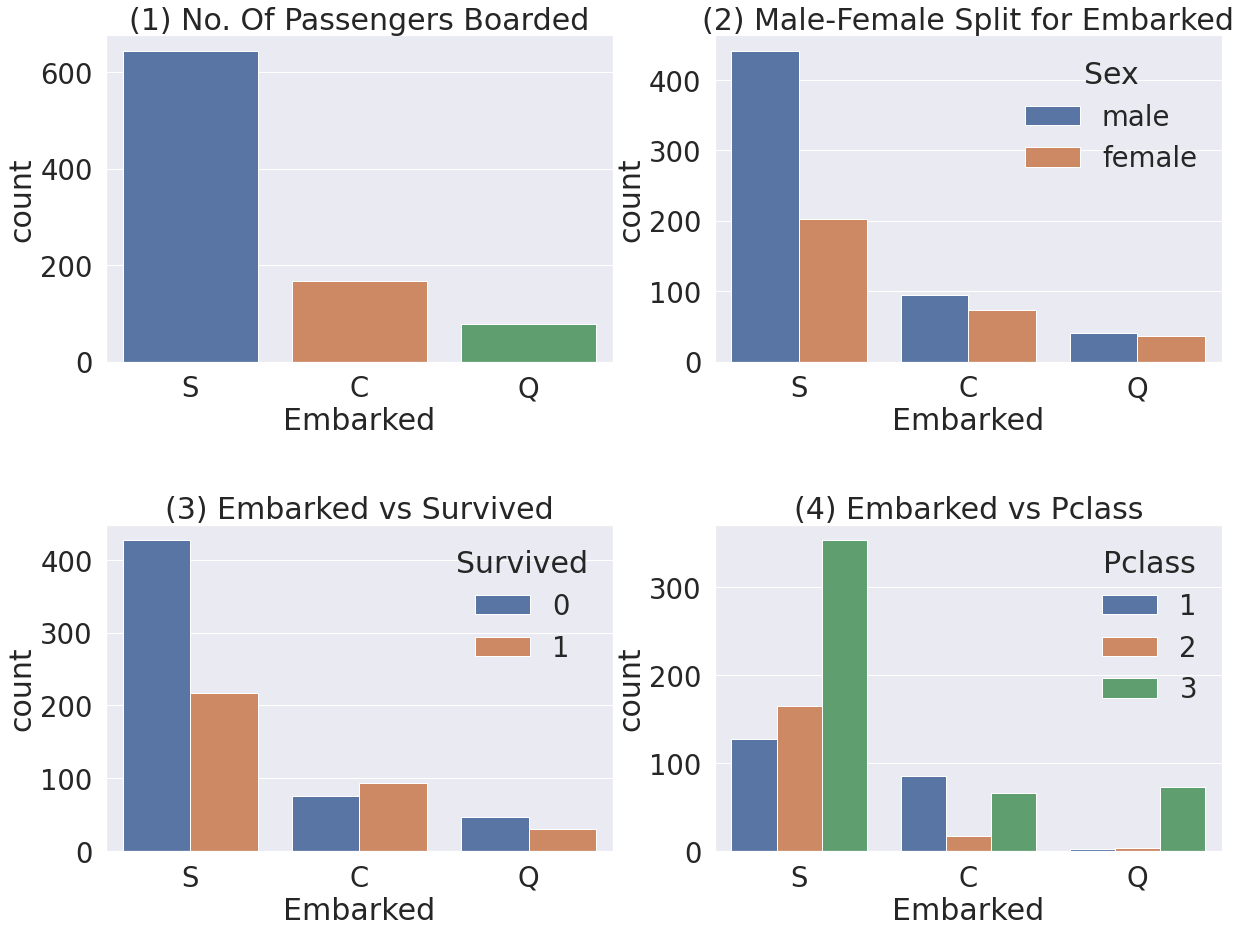

In [123]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 4. sibSp
함께 탑승한 형제와 배우자의 수

In [115]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


In [ ]:
ff =  df_train[df_train['Age'] < 20]['SibSp'].sum() -  df_train[df_train['Age'] < 10]['SibSp'].sum()
ff2 =  len(df_train[df_train['Age'] < 20]) - len(df_train[df_train['Age'] < 10])
print(ff+ff2, ff2)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 
cummulate_survival_ratio = []
for i in range(10, 81):
  ii = i - 10
  ff =  df_train[df_train['Age'] < i]['FamilySize'].sum() -  df_train[df_train['Age'] < ii]['FamilySize'].sum()
  ff2 =  len(df_train[df_train['Age'] < i]) - len(df_train[df_train['Age'] < ii])
  
  cummulate_survival_ratio.append(ff / ff2)

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

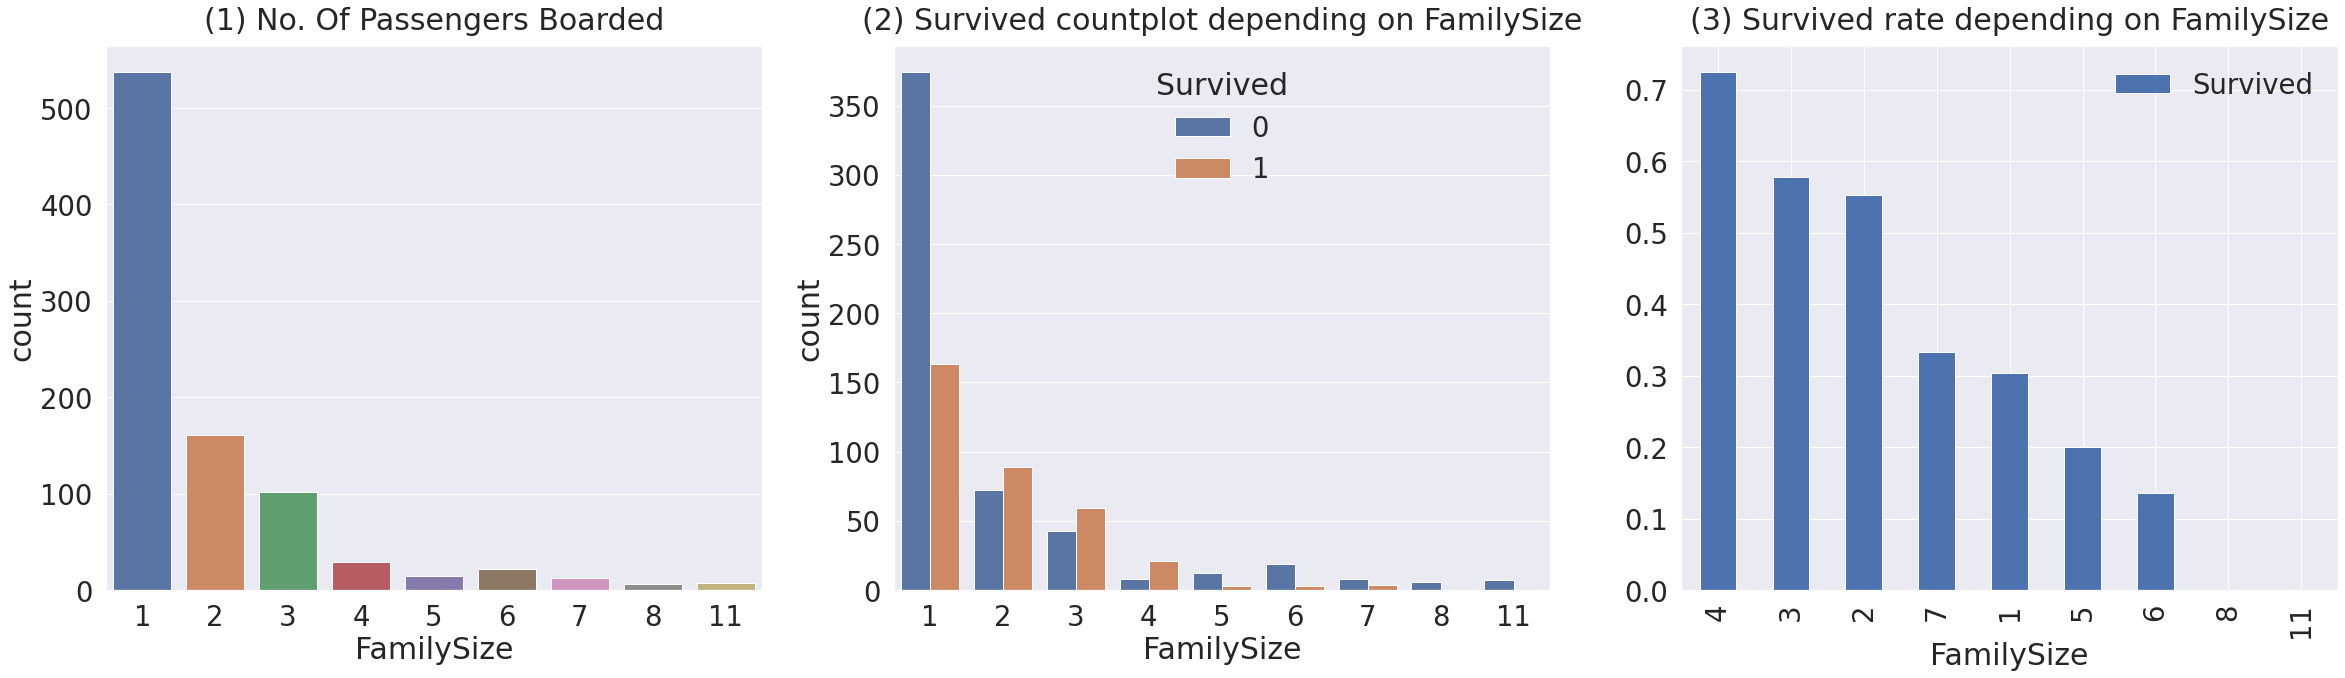

In [116]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

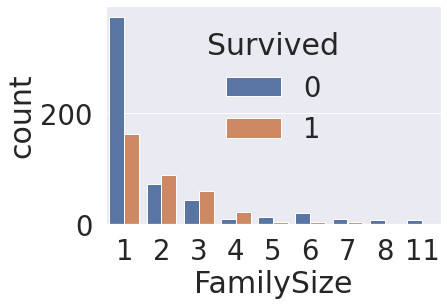

In [121]:
#df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).count()
sns.countplot('FamilySize', hue='Survived', data=df_train)

티켓을 pclass와 연관지어서 카운트 해보고 분류를 해보자!